# Yulu: Normality Testing

In [165]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

def season_category(x):
    if x == 1:
        return 'season_1'
    elif x == 2:
        return 'season_2'
    elif x == 3:
        return 'season_3'
    else:
        return 'season_4'

#### Reading the dataset

In [166]:
df = pd.read_csv('BRSM_Assignment_Datasets.csv')
data = df.copy()
print(df.head())
print()
print("Columns are given by:")
print(df.columns)
alpha = 0.05

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  

Columns are given by:
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


#### Shape of the dataset

In [167]:
df.shape

(10886, 12)

##### Converting the datatype of datetime column from object to datetime

In [168]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [169]:
df['season'] = df['season'].apply(season_category)

In [170]:
df['season'] = df['season'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')
df['temp'] = df['temp'].astype('float32')
df['atemp'] = df['atemp'].astype('float32')
df['humidity'] = df['humidity'].astype('float32')
df['windspeed'] = df['windspeed'].astype('float32')
df['casual'] = df['casual'].astype('int32')
df['registered'] = df['registered'].astype('int32')
df['count'] = df['count'].astype('int32')

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float32       
 6   atemp       10886 non-null  float32       
 7   humidity    10886 non-null  float32       
 8   windspeed   10886 non-null  float32       
 9   casual      10886 non-null  int32         
 10  registered  10886 non-null  int32         
 11  count       10886 non-null  int32         
dtypes: category(4), datetime64[ns](1), float32(4), int32(3)
memory usage: 426.0 KB


In [172]:
df.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.230862,23.655085,61.886459,12.799396,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,13.940000,16.665001,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,20.500000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,26.240000,31.059999,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,41.000000,45.455002,100.000000,56.996899,367.000000,886.000000,977.000000
std,NaN,7.791590,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


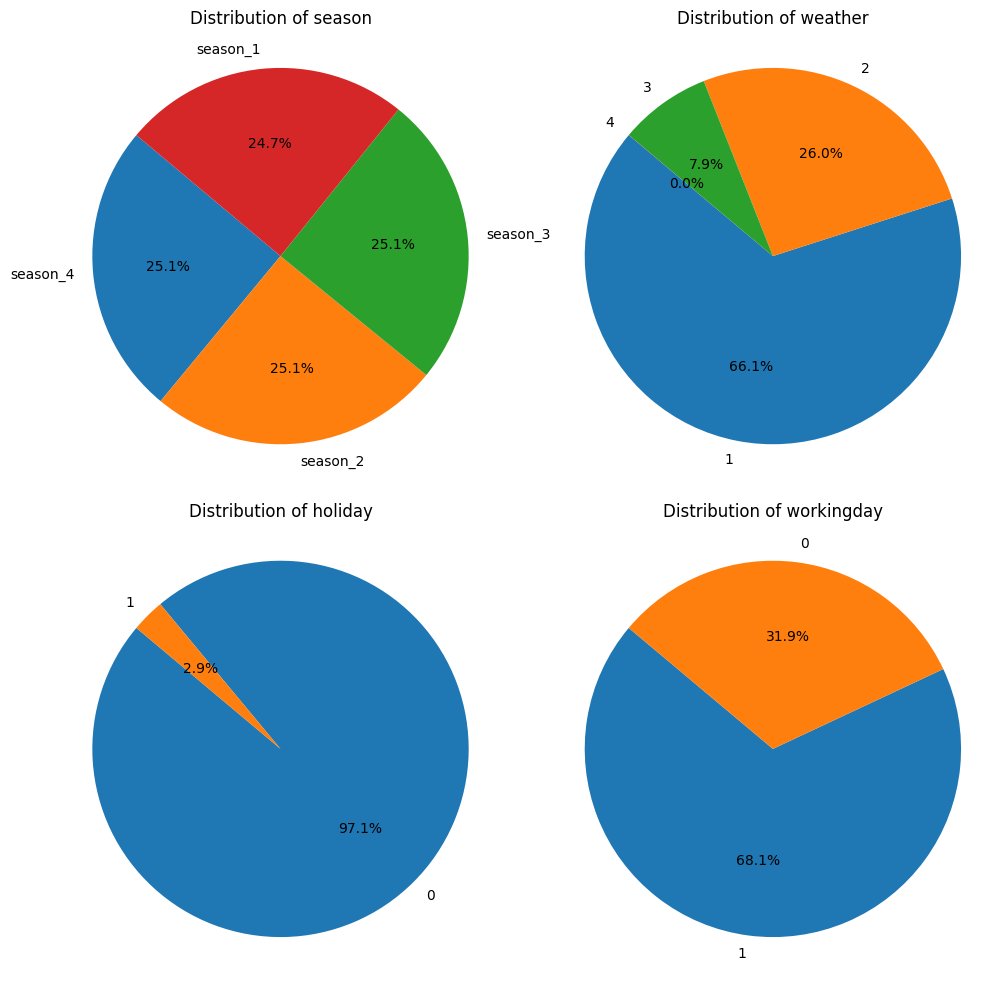

In [173]:
def plot_categorical_distribution(df, column, subplot_index):
    column_distribution = df[column].value_counts().reset_index()
    column_distribution.columns = [column, 'count']
    plt.subplot(subplot_index)
    plt.pie(column_distribution['count'], labels=column_distribution[column], autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {column}')
    plt.axis('equal')

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plot_categorical_distribution(df, 'season', 221)

plt.subplot(2, 2, 2)
plot_categorical_distribution(df, 'weather', 222)

plt.subplot(2, 2, 3)
plot_categorical_distribution(df, 'holiday', 223)

plt.subplot(2, 2, 4)
plot_categorical_distribution(df, 'workingday', 224)

plt.tight_layout()
plt.show()

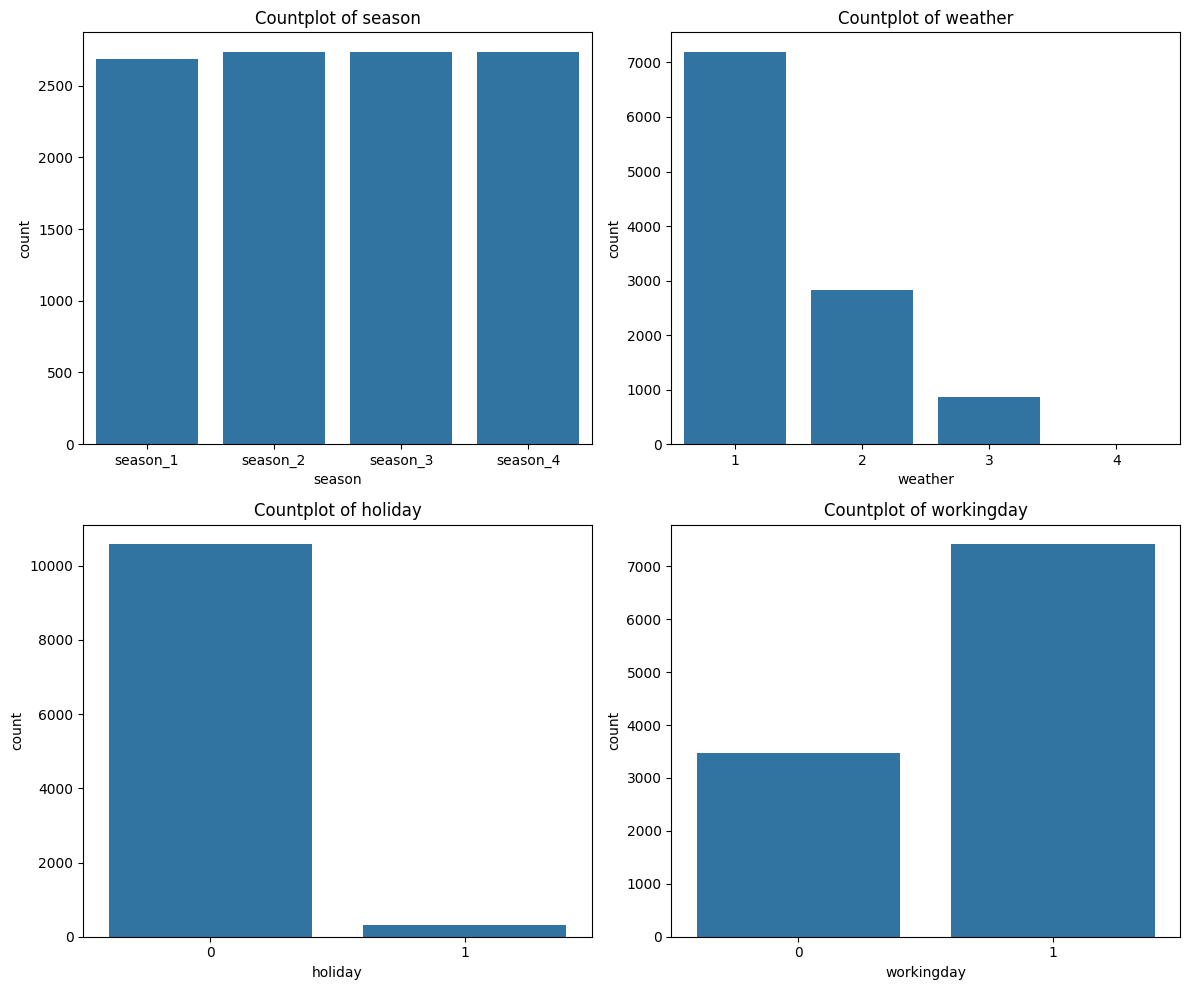

In [174]:
def plot_countplot(df, column, subplot_index):
    plt.subplot(subplot_index)
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plot_countplot(df, 'season', 221)

plt.subplot(2, 2, 2)
plot_countplot(df, 'weather', 222)

plt.subplot(2, 2, 3)
plot_countplot(df, 'holiday', 223)

plt.subplot(2, 2, 4)
plot_countplot(df, 'workingday', 224)

plt.tight_layout()
plt.show()


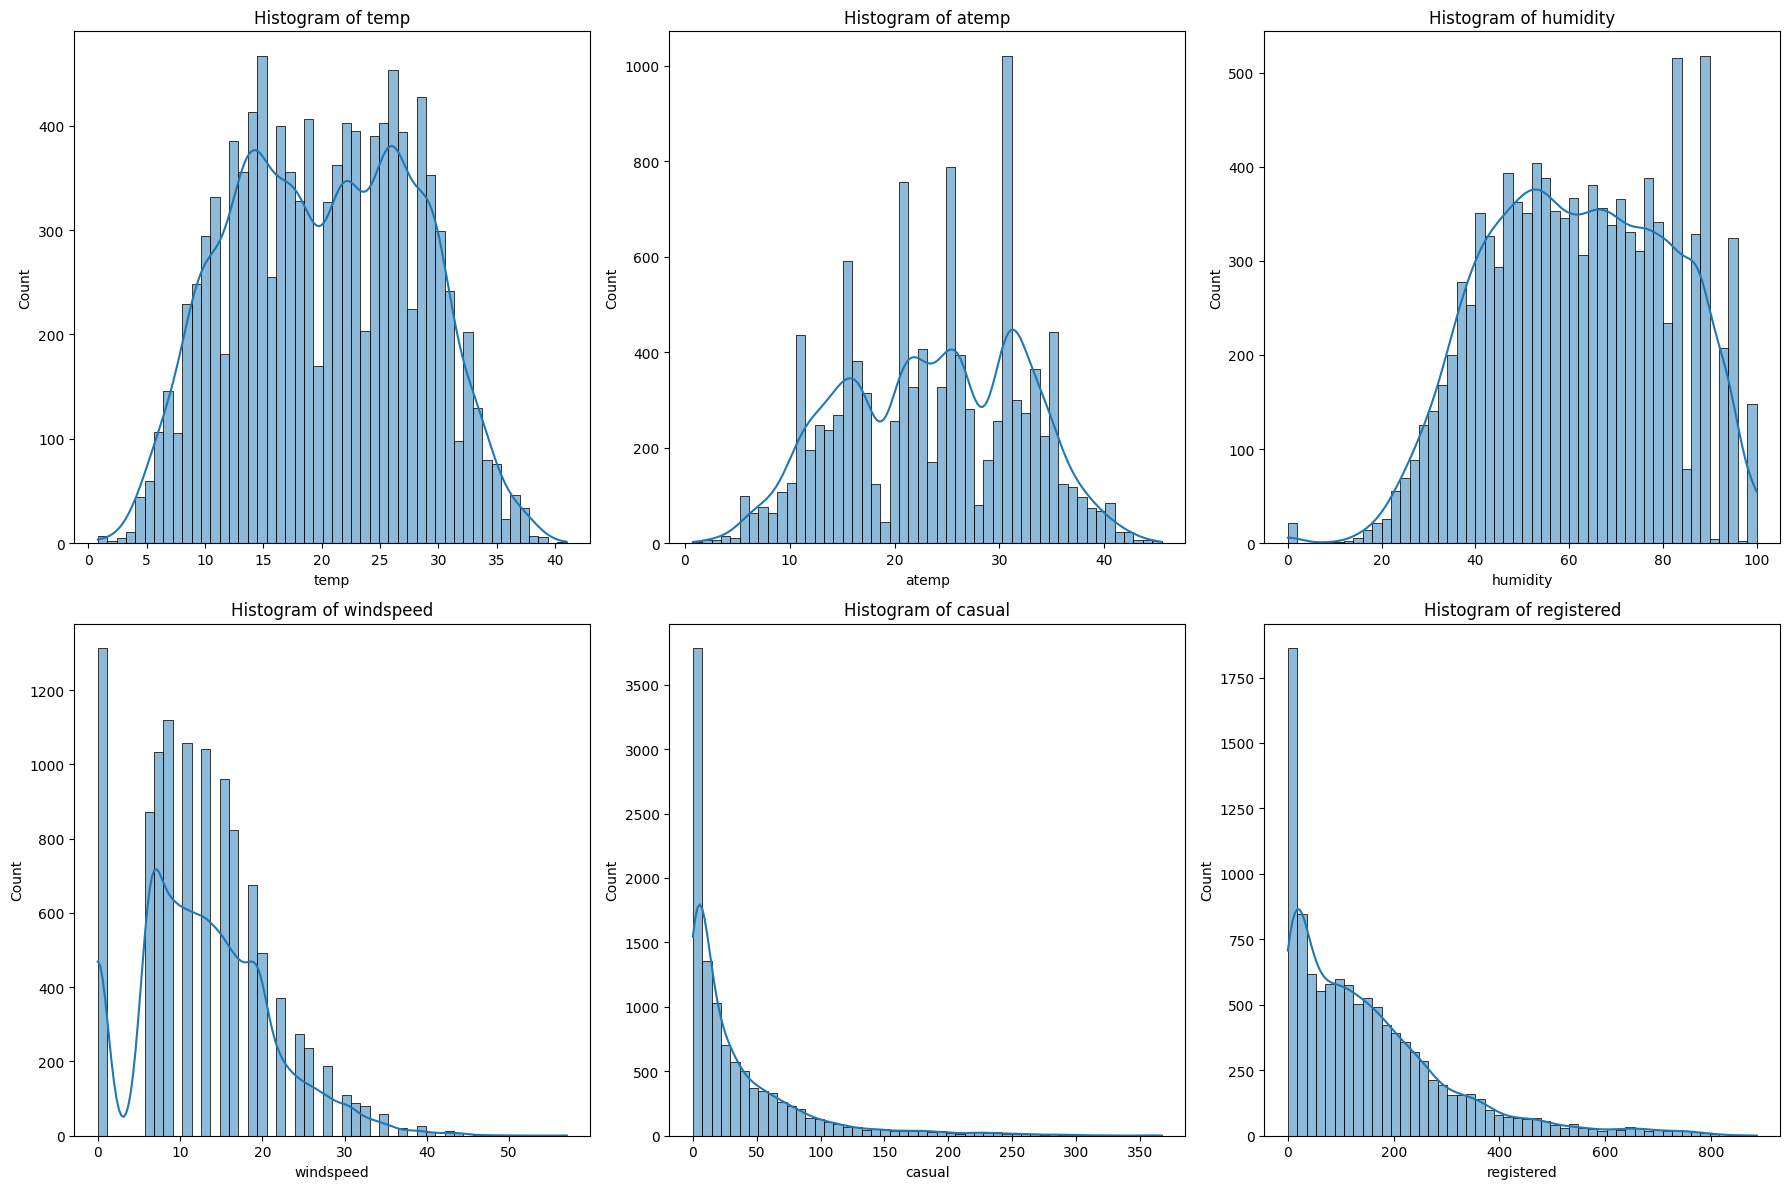

In [175]:
def plot_histplot(df, column, subplot_index):
    plt.subplot(subplot_index)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Histogram of {column}')

plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plot_histplot(df, 'temp', 231)

plt.subplot(2, 3, 2)
plot_histplot(df, 'atemp', 232)

plt.subplot(2, 3, 3)
plot_histplot(df, 'humidity', 233)

plt.subplot(2, 3, 4)
plot_histplot(df, 'windspeed', 234)

plt.subplot(2, 3, 5)
plot_histplot(df, 'casual', 235)

plt.subplot(2, 3, 6)
plot_histplot(df, 'registered', 236)

plt.tight_layout()
plt.show()


### Detecting Outliers in the dataset

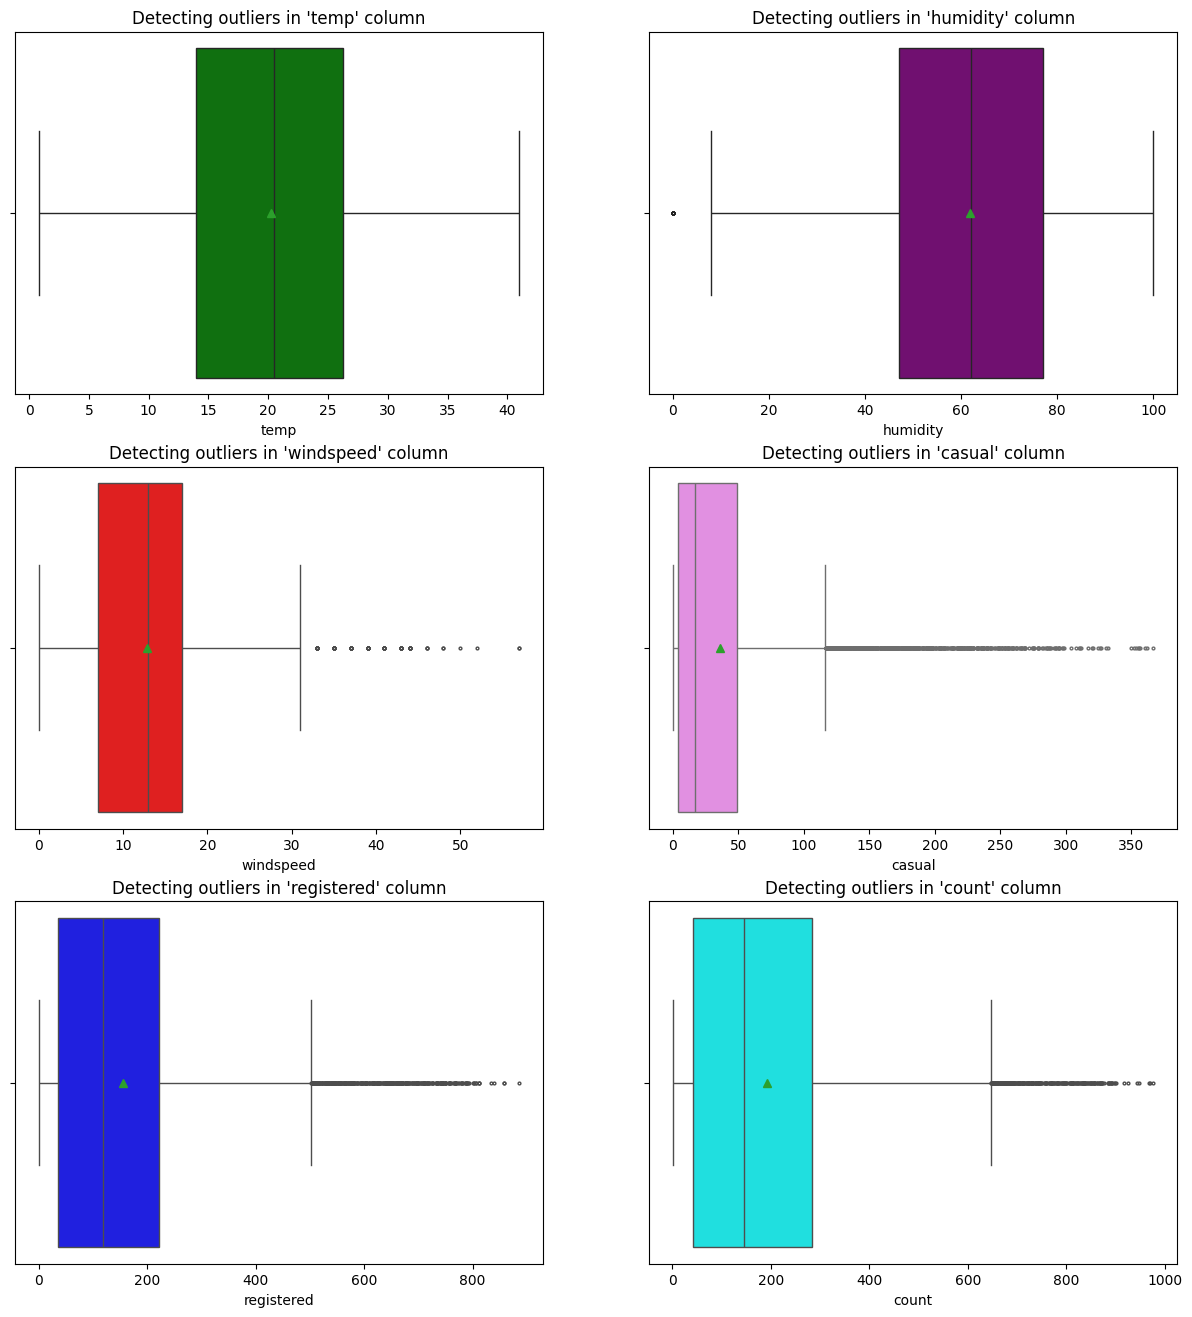

In [176]:
def plot_outliers(df, columns):
    colors = np.random.permutation(['green', 'blue', 'red', 'purple', 'cyan', 'violet'])
    count = 1
    plt.figure(figsize=(15, 16))
    for i in columns:
        plt.subplot(3, 2, count)
        plt.title(f"Detecting outliers in '{i}' column")
        sns.boxplot(data=df, x=df[i], color=colors[count - 1], showmeans=True, fliersize=2)
        plt.plot()
        count += 1

columns = ['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
plot_outliers(df, columns)

# Exploratory Analysis

- The lowest average hourly count of rental bikes is observed in January, followed by February and March.
- Out of every 100 users, approximately 19 are casual users, and 81 are registered users.
- Over 85% of the recorded windspeed data has a value of less than 20.
- The mean total hourly count of rental bikes is 144 for the year 2011 and 239 for the year 2012, indicating an annual growth rate of 65.41%.
- The dataset spans from January 1, 2011, to December 19, 2012, totaling 718 days and 23 hours.
- More than 80% of the time, the temperature remains below 28 degrees Celsius.
- Similarly, more than 80% of the time, the humidity value exceeds 40, indicating varying levels from optimum to too moist.
- Throughout the day, there is a notable fluctuation in counts, with lower counts during early morning hours, a morning peak, a peak count in the afternoon, and a gradual decline in the evening and nighttime.
- The count of rental bikes exhibits a seasonal pattern, with higher demand during the season_1 and season_2 months, a slight decline in the season_3, and further decrease in season_4.


# Correlation between the Variables

#### Partial Correlations between Variables

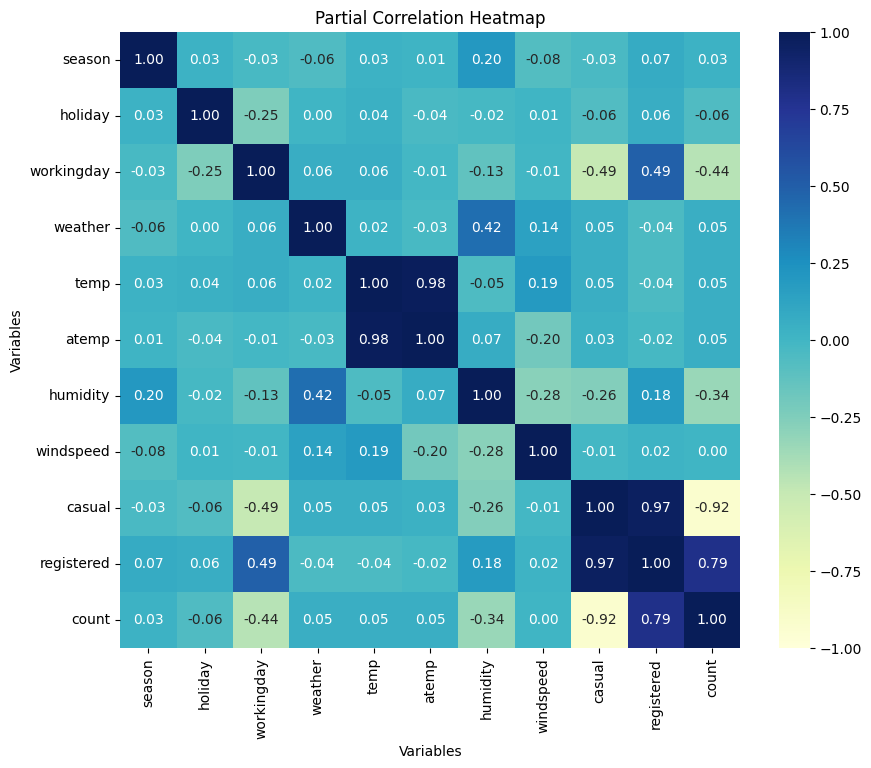

In [177]:
import pingouin as pg
def plot_partial_corr_heatmap(df):
    df_subset = df
    partial_corr = df_subset.pcorr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(data=partial_corr, cmap='YlGnBu', annot=True, fmt=".2f", vmin=-1, vmax=1)
    plt.title('Partial Correlation Heatmap')
    plt.xlabel('Variables')
    plt.ylabel('Variables')
    plt.show()

plot_partial_corr_heatmap(data)

#### Semi-Partial Correlations between Variables

In [178]:
import pandas as pd
import pingouin as pg

def calculate_semi_partial_correlations(data, main_variables, control_variables):
    results = []
    data['windspeed'] += 0.001
    for main_var in main_variables:
        for control_var in control_variables:
            current_controls = set(control_variables) - {control_var}
            semi_partial_corr = pg.partial_corr(data=data, x=main_var, y=control_var, covar=list(current_controls))
            correlation = semi_partial_corr['r'].iloc[0]
            results.append({'Main Variable': main_var, 'Control Variable': control_var, 'Correlation': correlation})
    return pd.DataFrame(results)

# Assuming df is your DataFrame
main_variables = ["count", "registered", "casual"]
control_variables = ["season", "holiday", "workingday", "weather", "temp", "atemp", "windspeed", "humidity"]

semi_partial_corr_matrix = calculate_semi_partial_correlations(data, main_variables, control_variables)
print(semi_partial_corr_matrix)

   Main Variable Control Variable  Correlation
0          count           season     0.151205
1          count          holiday    -0.009473
2          count       workingday    -0.003325
3          count          weather     0.021735
4          count             temp     0.015508
5          count            atemp     0.051327
6          count        windspeed     0.037257
7          count         humidity    -0.301704
8     registered           season     0.158171
9     registered          holiday     0.004206
10    registered       workingday     0.118971
11    registered          weather     0.010966
12    registered             temp     0.005006
13    registered            atemp     0.044091
14    registered        windspeed     0.039632
15    registered         humidity    -0.247559
16        casual           season     0.056757
17        casual          holiday    -0.054565
18        casual       workingday    -0.408466
19        casual          weather     0.050723
20        cas

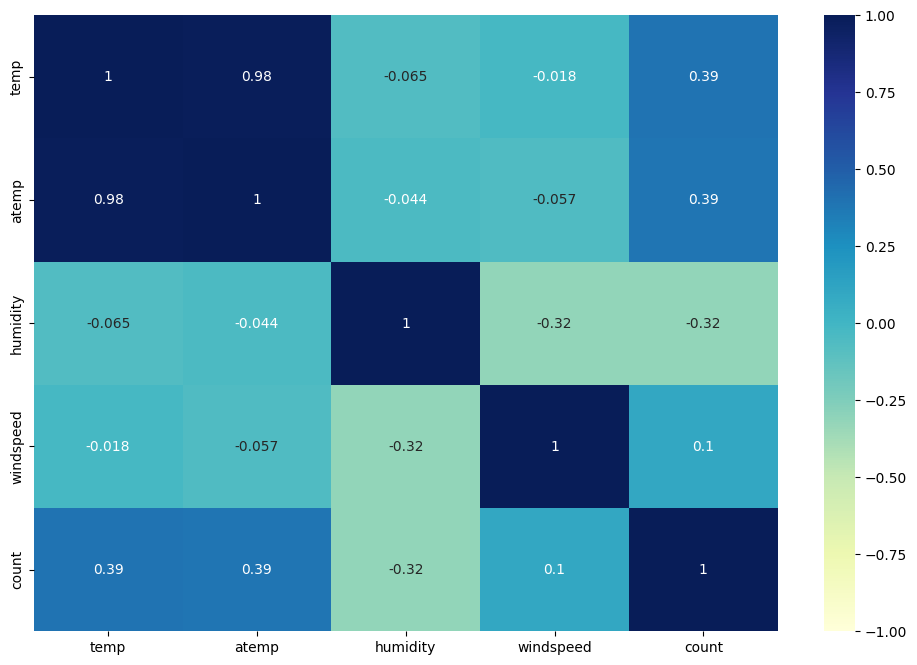

In [179]:
def plot_correlation_heatmap(df):
    new_df = df[['temp', 'atemp', 'humidity', 'windspeed', 'count']]
    corr_data = new_df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(data=corr_data, cmap='YlGnBu', annot=True, vmin=-1, vmax=1)
    plt.show()

plot_correlation_heatmap(data)

#### Partial and Semi-Partial Correlations

Based on the provided table of partial and semi-partial correlation results:

**Existence of Correlations:**
- **Partial Correlations:** There are statistically significant partial correlations between many pairs of variables. For example, "count" has a strong negative partial correlation with humidity, and "casual" has a strong negative partial correlation with workingday. These correlations persist even after controlling for the effects of other variables in the model.
  
- **Semi-Partial Correlations:** Similarly, significant semi-partial correlations exist. The semi-partial correlation provides insight into the unique contribution of one variable to the dependent variable while controlling for other variables. For instance, "casual" has a significant negative semi-partial correlation with humidity, indicating that "casual" uniquely predicts the dependent variable while considering other factors.

**Implications:**
- Significant partial correlations suggest independent relationships between variables, such as the negative correlation between count and humidity, indicating fewer rentals with increasing humidity, regardless of other factors.
- Significant semi-partial correlations highlight unique relationships with the dependent variable, like fewer casual riders on working days, irrespective of weather conditions.

**Usage of Partial Correlations:**
- Partial correlations elucidate direct relationships between variables by removing the influence of others, beneficial in complex datasets to identify associations unaffected by confounding variables.

**Observations:**
- High correlations involving humidity imply its strong relationship with rental counts and user types.
- Differences in vehicle usage patterns on working days compared to holidays persist after accounting for other factors.
- Temperature's direct influence on rental behaviors appears less pronounced when considering other factors.

**Conclusion:**
The identified correlations shed light on factors influencing vehicle rental behaviors, with humidity and working days showing robust and unique relationships with rental counts and user types. These insights can guide strategies to enhance rental services based on specific user needs and conditions.



### Inferences on Correlations

- No high positive or negative correlations (0.7 - 0.9) are found between any columns.
- Low positive correlations (0.3 - 0.5) exist between the columns [count, temp], [count, atemp], and [casual, atemp].
- Moderate positive correlations (0.5 - 0.7) are observed between the columns [casual, count] and [casual, registered].
- A very high correlation (> 0.9) is observed between the columns [atemp, temp] and [count, registered].
- Negligible correlation is noted between all other combinations of columns

## Does the presence of a working day influence the quantity of electric cycles rented ?

#### Set up Null Hypothesis

  * **Null Hypothesis ( H0 )** - Working Day does not have any effect on the number of electric cycles rented. 

  * **Alternate Hypothesis ( HA )** - Working Day has some effect on the number of electric cycles rented

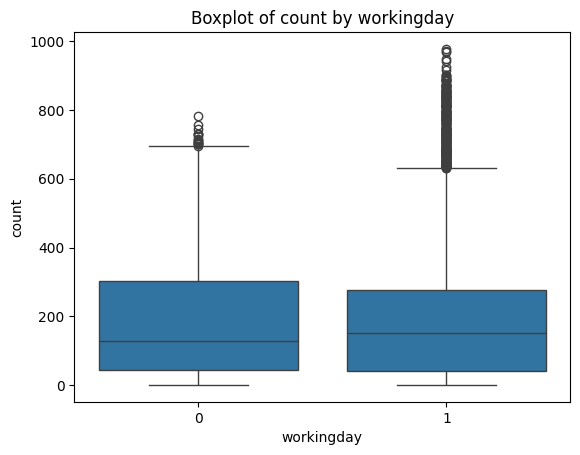

In [180]:
def plot_boxplot(df, x_column, y_column):
    sns.boxplot(data=df, x=x_column, y=y_column)
    plt.title(f'Boxplot of {y_column} by {x_column}')
    plt.show()


plot_boxplot(df, 'workingday', 'count')

***Visual examinations to ascertain whether the samples adhere to a normal distribution***

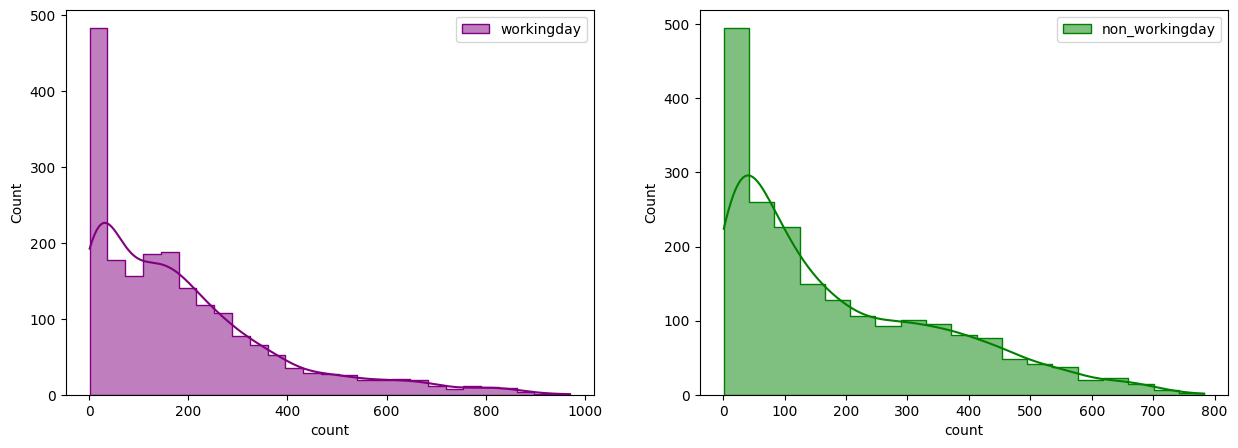

In [181]:
def plot_workingday_comparison_hist(df, column, sample_size=2000):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df.loc[df['workingday'] == 1, column].sample(sample_size),
                 element='step', color='purple', kde=True, label='workingday')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    sns.histplot(df.loc[df['workingday'] == 0, column].sample(sample_size),
                 element='step', color='green', kde=True, label='non_workingday')
    plt.legend()
    
    plt.show()

plot_workingday_comparison_hist(df, 'count')

  ```
  Based on the plot above, it can be deduced that the distributions deviate from the normal distribution pattern.
  ```

***Assessing distribution via QQ Plot***

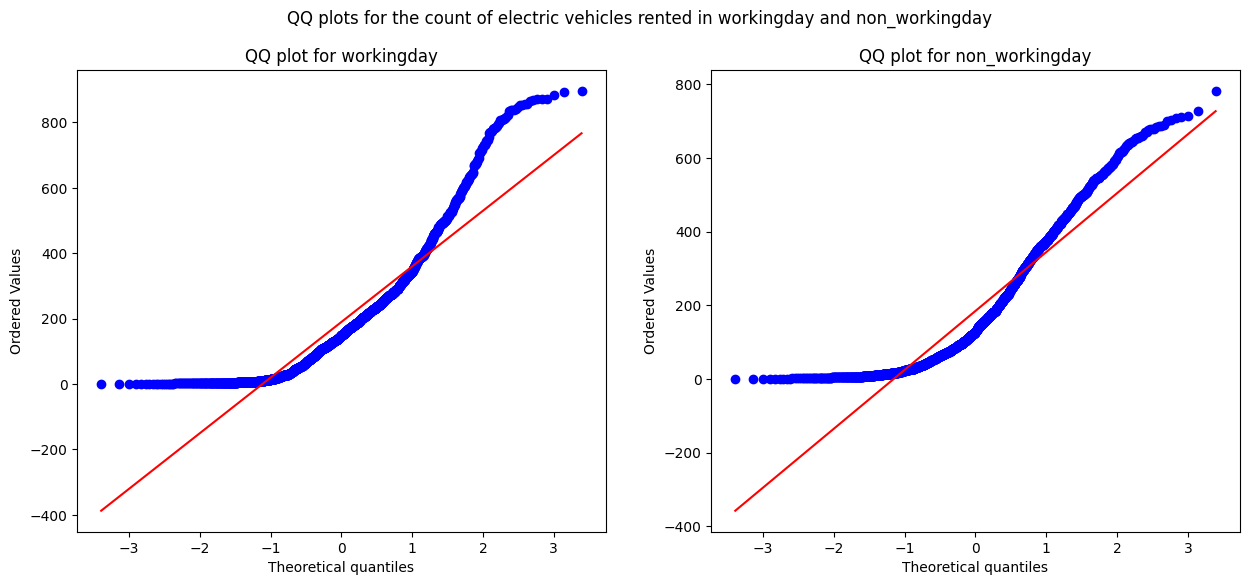

In [182]:
def qq_plot_workingday_comparison(df, column, sample_size=2000):
    plt.figure(figsize=(15, 6))
    plt.suptitle('QQ plots for the count of electric vehicles rented in workingday and non_workingday')

    plt.subplot(1, 2, 1)
    stats.probplot(df.loc[df['workingday'] == 1, column].sample(sample_size), plot=plt, dist='norm')
    plt.title('QQ plot for workingday')

    plt.subplot(1, 2, 2)
    stats.probplot(df.loc[df['workingday'] == 0, column].sample(sample_size), plot=plt, dist='norm')
    plt.title('QQ plot for non_workingday')

    plt.show()

qq_plot_workingday_comparison(df, 'count')

  ```
  In a QQ plot, if data points closely align with the diagonal line, the distribution is likely normal. Deviations from this line suggest non-normality, with S-shaped curves indicating heavier tails or peakedness. Based on the plot above, it can be deduced that the distributions deviate from the normal distribution pattern.
  ```

#### Conducting the Shapiro-Wilk test to assess normality.

$H_0$: The sample conforms to a normal distribution.  
$H_1$: The sample deviates from a normal distribution.  

Significance Level ($\alpha$) = 0.05  

Test Statistics: Shapiro-Wilk test for normality


In [183]:
def shapiro_test_normality(data, column, condition_column, condition_value, sample_size=2000, alpha=0.05):
    sample = data.loc[data[condition_column] == condition_value, column].sample(sample_size)
    test_stat, p_value = stats.shapiro(sample)
    print('p-value:', p_value)
    if p_value < alpha:
        print('The sample does not follow a normal distribution')
    else:
        print('The sample follows a normal distribution')

print("Workingday")
shapiro_test_normality(df, 'count', 'workingday', 1)
print()
print("Non-Workingday")
shapiro_test_normality(df, 'count', 'workingday', 0)

Workingday
p-value: 4.0055231172291755e-38
The sample does not follow a normal distribution

Non-Workingday
p-value: 4.384645369207715e-36
The sample does not follow a normal distribution


***Applying the Box-Cox transformation to the data and assessing whether the transformed data adheres to a normal distribution.***

In [184]:
def boxcox_shapiro_test_normality(data, column, condition_column, condition_value, alpha=0.05):
    transformed_data = stats.boxcox(data.loc[data[condition_column] == condition_value, column])[0]
    test_stat, p_value = stats.shapiro(transformed_data)
    print('p-value:', p_value)
    if p_value < alpha:
        print('The sample does not follow a normal distribution')
    else:
        print('The sample follows a normal distribution')

print("Workingday")
boxcox_shapiro_test_normality(df, 'count', 'workingday', 1)
print()
print("Non-Workingday")
boxcox_shapiro_test_normality(df, 'count', 'workingday', 0)


Workingday
p-value: 1.606449722752868e-33
The sample does not follow a normal distribution

Non-Workingday
p-value: 8.140929444965395e-24
The sample does not follow a normal distribution


/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_2675/1579685415.py:3: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7412.
  test_stat, p_value = stats.shapiro(transformed_data)


Workingday: ***The sample does not follow a normal distribution (p < 0.05)***

Non-Workingday: ***Similarly, the sample does not follow a normal distribution (p < 0.05)***

Both samples fail the test for normality.

Despite applying the Box-Cox transformation to both the "workingday" and "non_workingday" datasets, neither conforms to a normal distribution.

```
As the samples do not exhibit a normal distribution, the application of the T-Test is inappropriate. Instead, we can utilize its non-parametric counterpart, the Mann-Whitney U rank test, for comparison between two independent samples.
```

##### Ho : Mean number of electric cycles rented is the same for working and non-working days
##### Ha : Mean number of electric cycles rented is not the same for working and non-working days
##### Assuming a significance level of 0.05
##### Test statistics: Mann-Whitney U rank test for two independent samples


In [185]:
import scipy.stats as stats

def mann_whitney_test(df, column, condition_column, condition_value, alpha=0.05):
    test_stat, p_value = stats.mannwhitneyu(df.loc[df[condition_column] == condition_value, column],
                                             df.loc[df[condition_column] != condition_value, column])
    print('P-value:', p_value)
    if p_value < alpha:
        print('Mean number of electric cycles rented is not the same for working and non-working days')
    else:
        print('Mean number of electric cycles rented is the same for working and non-working days')


mann_whitney_test(df, 'count', 'workingday', 1)


P-value: 0.9679139953914079
Mean number of electric cycles rented is the same for working and non-working days


##### Hence, there is no statistically significant difference in the mean hourly count of total rental bikes between working and non-working days.

## Does the presence of holidays affect the number of electric cycles rented?

#### Set up Null Hypothesis

  * **Null Hypothesis ( H0 )** - Holidays have no effect on the number of electric vehicles rented
  * **Alternate Hypothesis ( HA )** - Holidays has some effect on the number of electric vehicles rented

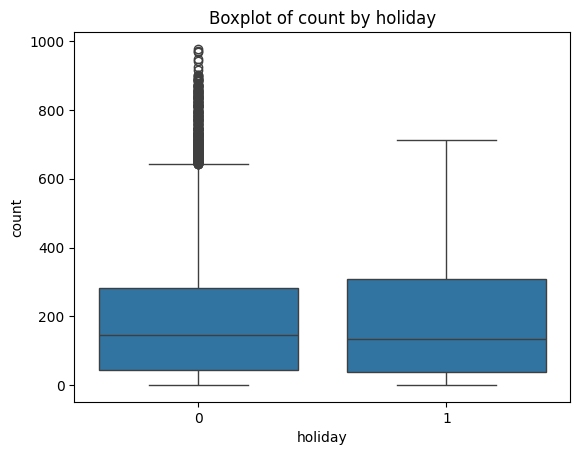

In [186]:
def plot_boxplot(df, x_column, y_column):
    sns.boxplot(data=df, x=x_column, y=y_column)
    plt.title(f'Boxplot of {y_column} by {x_column}')
    plt.show()


plot_boxplot(df, 'holiday', 'count')

***Visual examinations to ascertain whether the samples adhere to a normal distribution***

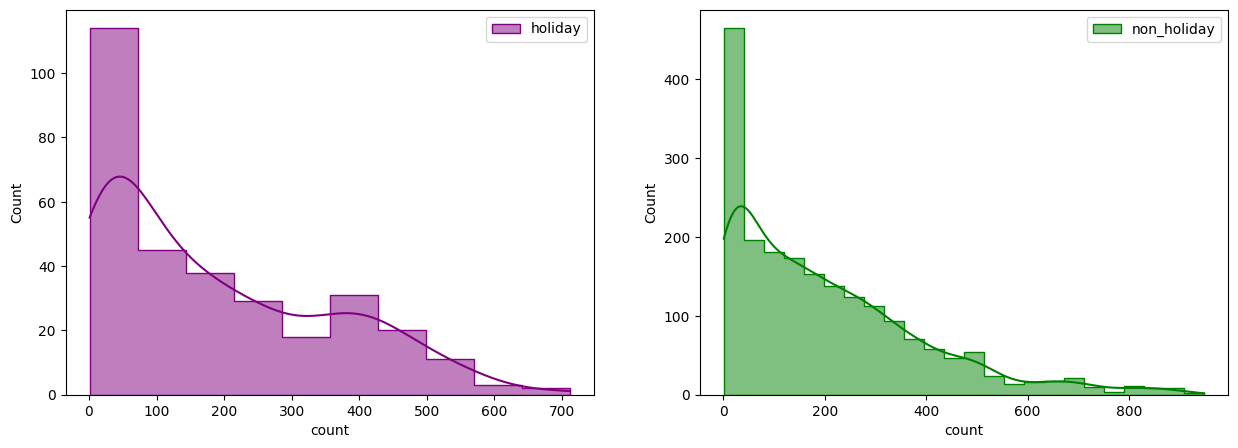

In [187]:
def plot_holiday_comparison_hist(df, column, sample_size=2000):
    holiday_sample = df.loc[df['holiday'] == 1, column]
    non_holiday_sample = df.loc[df['holiday'] == 0, column]

    if sample_size > len(holiday_sample):
        holiday_sample_size = len(holiday_sample)
    else:
        holiday_sample_size = sample_size

    if sample_size > len(non_holiday_sample):
        non_holiday_sample_size = len(non_holiday_sample)
    else:
        non_holiday_sample_size = sample_size

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(holiday_sample.sample(holiday_sample_size, replace=False),
                 element='step', color='purple', kde=True, label='holiday')
    plt.legend()
    plt.subplot(1, 2, 2)
    sns.histplot(non_holiday_sample.sample(non_holiday_sample_size, replace=False),
                 element='step', color='green', kde=True, label='non_holiday')
    plt.legend()
    plt.show()

plot_holiday_comparison_hist(df, 'count')

  ```
  Based on the plot above, it can be deduced that the distributions deviate from the normal distribution pattern.
  ```

***Assessing distribution via QQ Plot***

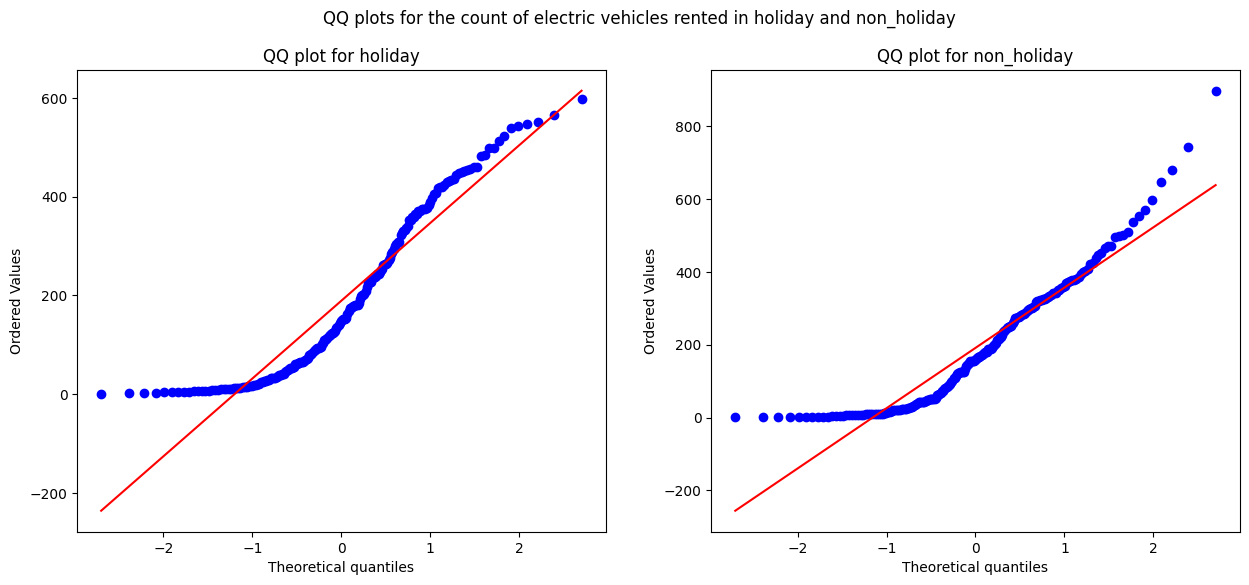

In [188]:
def plot_qq_holiday_comparison(df, column, sample_size=200):
    plt.figure(figsize=(15, 6))
    plt.suptitle('QQ plots for the count of electric vehicles rented in holiday and non_holiday')

    plt.subplot(1, 2, 1)
    stats.probplot(df.loc[df['holiday'] == 1, column].sample(sample_size), plot=plt, dist='norm')
    plt.title('QQ plot for holiday')

    plt.subplot(1, 2, 2)
    stats.probplot(df.loc[df['holiday'] == 0, column].sample(sample_size), plot=plt, dist='norm')
    plt.title('QQ plot for non_holiday')

    plt.show()

plot_qq_holiday_comparison(df, 'count')

  ```
  In a QQ plot, if data points closely align with the diagonal line, the distribution is likely normal. Deviations from this line suggest non-normality, with S-shaped curves indicating heavier tails or peakedness. Based on the plot above, it can be deduced that the distributions deviate from the normal distribution pattern.
  ```

#### Conducting the Shapiro-Wilk test to assess normality.

$H_0$: The sample conforms to a normal distribution.  
$H_1$: The sample deviates from a normal distribution.  

Significance Level ($\alpha$) = 0.05  

Test Statistics: Shapiro-Wilk test for normality


In [189]:
def shapiro_test_holiday(df, column, holiday_value, alpha=0.05, sample_size=200):
    sample = df.loc[df['holiday'] == holiday_value, column].sample(sample_size)
    test_stat, p_value = stats.shapiro(sample)
    print('p-value:', p_value)
    if p_value < alpha:
        print('The sample does not follow normal distribution')
    else:
        print('The sample follows normal distribution')

print('Holiday')
shapiro_test_holiday(df, 'count', 1)
print()
print('Non-Holiday')
shapiro_test_holiday(df, 'count', 0)

Holiday
p-value: 6.050815038488292e-11
The sample does not follow normal distribution

Non-Holiday
p-value: 1.152826952999538e-12
The sample does not follow normal distribution


***Applying the Box-Cox transformation to the data and assessing whether the transformed data adheres to a normal distribution.***

In [190]:
def boxcox_shapiro_test_holiday(df, column, holiday_value, alpha=0.05):
    transformed_data = stats.boxcox(df.loc[df['holiday'] == holiday_value, column])[0]
    test_stat, p_value = stats.shapiro(transformed_data)
    print('p-value:', p_value)
    if p_value < alpha:
        print('The sample does not follow normal distribution')
    else:
        print('The sample follows normal distribution')

print('Holiday')
boxcox_shapiro_test_holiday(df, 'count', 1)
print()
print('Non-Holiday')
boxcox_shapiro_test_holiday(df, 'count', 0)

Holiday
p-value: 2.134933458313291e-07
The sample does not follow normal distribution

Non-Holiday
p-value: 1.411562913878583e-36
The sample does not follow normal distribution


/var/folders/kk/7w6727t942z6xwr_96jpcwtc0000gn/T/ipykernel_2675/764229625.py:3: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10575.
  test_stat, p_value = stats.shapiro(transformed_data)


Holiday: ***The sample does not follow a normal distribution (p < 0.05)***

Non-Holiday: ***Similarly, the sample does not follow a normal distribution (p < 0.05)***

Both samples fail the test for normality.

Despite employing the Box-Cox transformation on both the "holiday" and "non-holiday" datasets, the samples do not conform to a normal distribution.***

```
As the samples do not exhibit a normal distribution, the application of the T-Test is not appropriate. Instead, we can conduct its non-parametric equivalent test, namely the Mann-Whitney U rank test, for two independent samples.
```

##### Ho : Number of electric cycles rented is similar for holidays and non-holidays
##### Ha : Number of electric cycles rented is not similar for holidays and non-holidays days
##### Assuming significance level to be 0.05
##### Test statistics : Mann-Whitney U rank test for two independent samples


In [191]:
def mann_whitney_holiday_test(df, column, alpha=0.05, sample_size=200):
    test_stat, p_value = stats.mannwhitneyu(df.loc[df['holiday'] == 0, column].sample(sample_size),
                                             df.loc[df['holiday'] == 1, column].sample(sample_size))
    print('P-value:', p_value)
    if p_value < alpha:
        print('Number of electric cycles rented is not similar for holidays and non-holidays days')
    else:
        print('Number of electric cycles rented is similar for holidays and non-holidays')


mann_whitney_holiday_test(df, 'count')

P-value: 0.4832708697957452
Number of electric cycles rented is similar for holidays and non-holidays


##### Thus, the quantity of electric cycles rented shows statistical similarity between holidays and non-holidays.

## Does the number of rented cycles remain consistent or vary across different weather conditions?

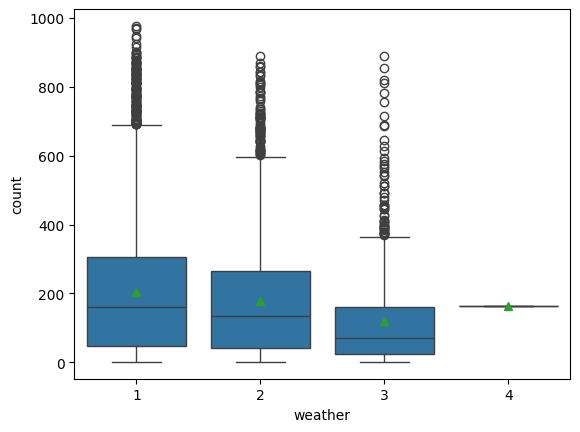

len(df_weather1) =  7192
len(df_weather2) =  2834
len(df_weather3) =  859
len(df_weather4) =  1


In [192]:
def plot_boxplot_weather(df):
    sns.boxplot(data=df, x='weather', y='count', showmeans=True)
    plt.show()

plot_boxplot_weather(df)
df_weather1 = df.loc[df['weather'] == 1]
print("len(df_weather1) = ", len(df_weather1))
df_weather2 = df.loc[df['weather'] == 2]
print("len(df_weather2) = ", len(df_weather2))
df_weather3 = df.loc[df['weather'] == 3]
print("len(df_weather3) = ", len(df_weather3))
df_weather4 = df.loc[df['weather'] == 4]
print("len(df_weather4) = ", len(df_weather4))

#### Set up Null Hypothesis

* **Null Hypothesis ( H0 )** - Mean of cycle rented per hour is same for weather 1, 2 and 3. 
(We wont be considering weather 4 as there in only 1 data point for weather 4 and we cannot perform a ANOVA test with a single data point for a group)

* **Alternate Hypothesis ( HA )** -Mean of cycle rented per hour is not same for season 1,2,3 and 4 are different.

***Visual examinations to ascertain whether the samples adhere to a normal distribution***

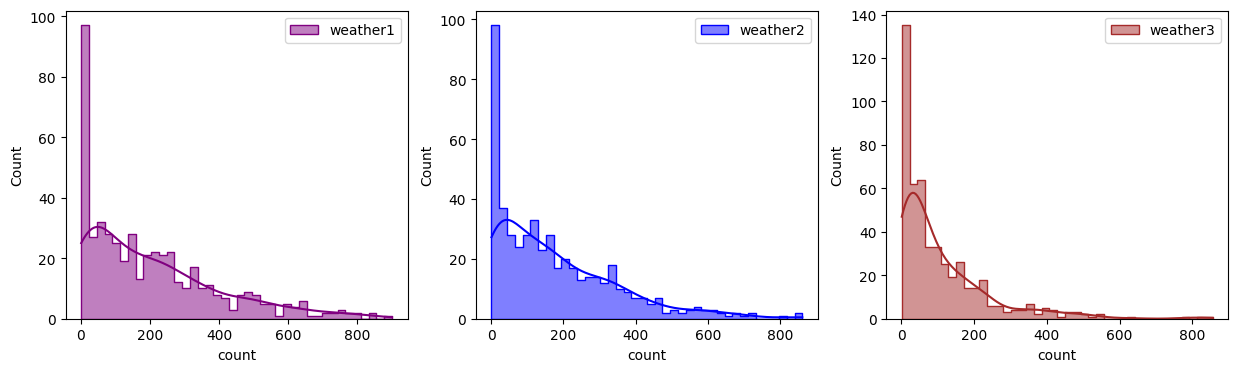

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_histplot_weather(df_weather1, df_weather2, df_weather3, sample_size=500):
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 3, 1)
    sns.histplot(df_weather1.loc[:, 'count'].sample(sample_size), bins=40, 
                 element='step', color='purple', kde=True, label='weather1')
    plt.legend()
    plt.subplot(1, 3, 2)
    sns.histplot(df_weather2.loc[:, 'count'].sample(sample_size), bins=40,
                 element='step', color='blue', kde=True, label='weather2')
    plt.legend()
    plt.subplot(1, 3, 3)
    sns.histplot(df_weather3.loc[:, 'count'].sample(sample_size), bins=40,
                 element='step', color='brown', kde=True, label='weather3')
    plt.legend()
    plt.show()

plot_histplot_weather(df_weather1, df_weather2, df_weather3)

```
Based on the plot above, it can be deduced that the distributions deviate from the normal distribution pattern.
```

***Assessing distribution via QQ Plot***

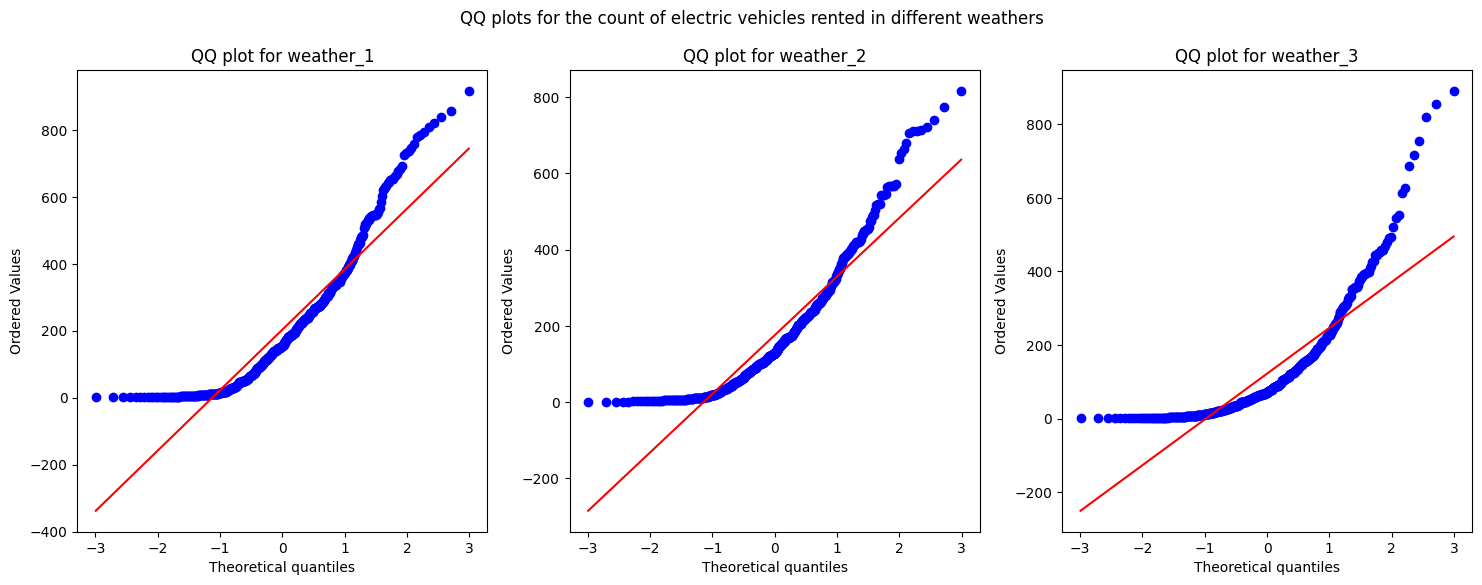

In [194]:
def plot_qq_weather(df_weather1, df_weather2, df_weather3, sample_size=500):
    plt.figure(figsize=(18, 6))
    plt.suptitle('QQ plots for the count of electric vehicles rented in different weathers')

    plt.subplot(1, 3, 1)
    stats.probplot(df_weather1.loc[:, 'count'].sample(sample_size), plot=plt, dist='norm')
    plt.title('QQ plot for weather_1')

    plt.subplot(1, 3, 2)
    stats.probplot(df_weather2.loc[:, 'count'].sample(sample_size), plot=plt, dist='norm')
    plt.title('QQ plot for weather_2')

    plt.subplot(1, 3, 3)
    stats.probplot(df_weather3.loc[:, 'count'].sample(sample_size), plot=plt, dist='norm')
    plt.title('QQ plot for weather_3')

    plt.show()

plot_qq_weather(df_weather1, df_weather2, df_weather3)

```
In a QQ plot, if data points closely align with the diagonal line, the distribution is likely normal. Deviations from this line suggest non-normality, with S-shaped curves indicating heavier tails or peakedness. Based on the plot above, it can be deduced that the distributions deviate from the normal distribution pattern.
```

#### Conducting the Shapiro-Wilk test to assess normality.

$H_0$: The sample conforms to a normal distribution.  
$H_1$: The sample deviates from a normal distribution.  

Significance Level ($\alpha$) = 0.05  

Test Statistics: Shapiro-Wilk test for normality


In [195]:
def shapiro_test_weather(df_weather, sample_size=500):
    for i, df in enumerate(df_weather, start=1):
        test_stat, p_value = stats.shapiro(df.loc[:, 'count'].sample(sample_size))
        print(f'Weather {i}:')
        print('P-value:', p_value)
        if p_value < 0.05:
            print('The sample does not follow normal distribution')
        else:
            print('The sample follows normal distribution')
        print()

shapiro_test_weather([df_weather1, df_weather2, df_weather3])

Weather 1:
P-value: 1.5509246085862853e-20
The sample does not follow normal distribution

Weather 2:
P-value: 1.3652772463303648e-18
The sample does not follow normal distribution

Weather 3:
P-value: 3.804245753589141e-25
The sample does not follow normal distribution



***Applying the Box-Cox transformation to the data and assessing whether the transformed data adheres to a normal distribution***

In [196]:
def boxcox_shapiro_test_weather(df_weather, sample_size=500):
    for i, df in enumerate(df_weather, start=1):
        df_size = len(df.loc[:, 'count'])
        if sample_size > df_size:
            sample_size = df_size
            print(f"Sample size reduced to {sample_size} due to population size limitation.")
            
        transformed_data = stats.boxcox(df.loc[:, 'count'].sample(sample_size, replace=True))[0]
        test_stat, p_value = stats.shapiro(transformed_data)
        print(f'Weather {i}:')
        print('P-value:', p_value)
        if p_value < 0.05:
            print('The sample does not follow normal distribution')
        else:
            print('The sample follows normal distribution')
        print()

boxcox_shapiro_test_weather([df_weather1, df_weather2, df_weather3])

Weather 1:
P-value: 9.381083932302074e-06
The sample does not follow normal distribution

Weather 2:
P-value: 1.714582473813351e-08
The sample does not follow normal distribution

Weather 3:
P-value: 0.004534852335751225
The sample does not follow normal distribution



Weather 1: ***The sample does not follow a normal distribution (p < 0.05)***

Weather 2: ***Similarly, the sample does not follow a normal distribution (p < 0.05)***

Weather 3: ***Likewise, the sample does not follow a normal distribution (p < 0.05)***

All weather samples fail the test for normality.

```
Due to the samples' lack of normal distribution and unequal variance, the f_oneway test cannot be applied. Instead, we can conduct its non-parametric equivalent test, the Kruskal-Wallis H-test for independent samples
```

##### Ho : Mean no. of cycles rented is same for different weather
##### Ha : Mean no. of cycles rented is different for different weather
##### Assuming significance Level to be 0.05


In [197]:
import numpy as np
import scipy.stats as stats

def kruskal_wallis_test_weather(df_weather1, df_weather2, df_weather3, alpha=0.05):
    test_stat, p_value = stats.kruskal(df_weather1, df_weather2, df_weather3)  
    print('Test Statistic =', test_stat)
    print('p value =', p_value)
    p_value = np.mean(p_value)
    if p_value < alpha:
        print('Reject Null Hypothesis')
    else:
        print('Failed to reject Null Hypothesis')

kruskal_wallis_test_weather(df_weather1, df_weather2, df_weather3)

Test Statistic = [1.36471292e+01 1.83091584e+00 5.37649760e+00 1.56915686e+01
 1.08840000e+04 3.70017441e+01 4.14298489e+01 1.83168690e+03
 2.80380482e+01 2.84639685e+02 1.73745440e+02 2.04955668e+02]
p value = [1.08783632e-03 4.00333264e-01 6.79999165e-02 3.91398508e-04
 0.00000000e+00 9.22939752e-09 1.00837627e-09 0.00000000e+00
 8.15859150e-07 1.55338046e-62 1.86920588e-38 3.12206618e-45]
Reject Null Hypothesis


##### Hence, there is a statistically significant difference in the average number of rental bikes across varying weather conditions.

## Does the number of rented cycles vary across different seasons ?

#### Set up Null Hypothesis

* **Null Hypothesis ( H0 )** - Mean of cycle rented per hour is same for season 1,2,3 and 4.
* **Alternate Hypothesis ( HA )** -Mean of cycle rented per hour is different for season 1,2,3 and 4

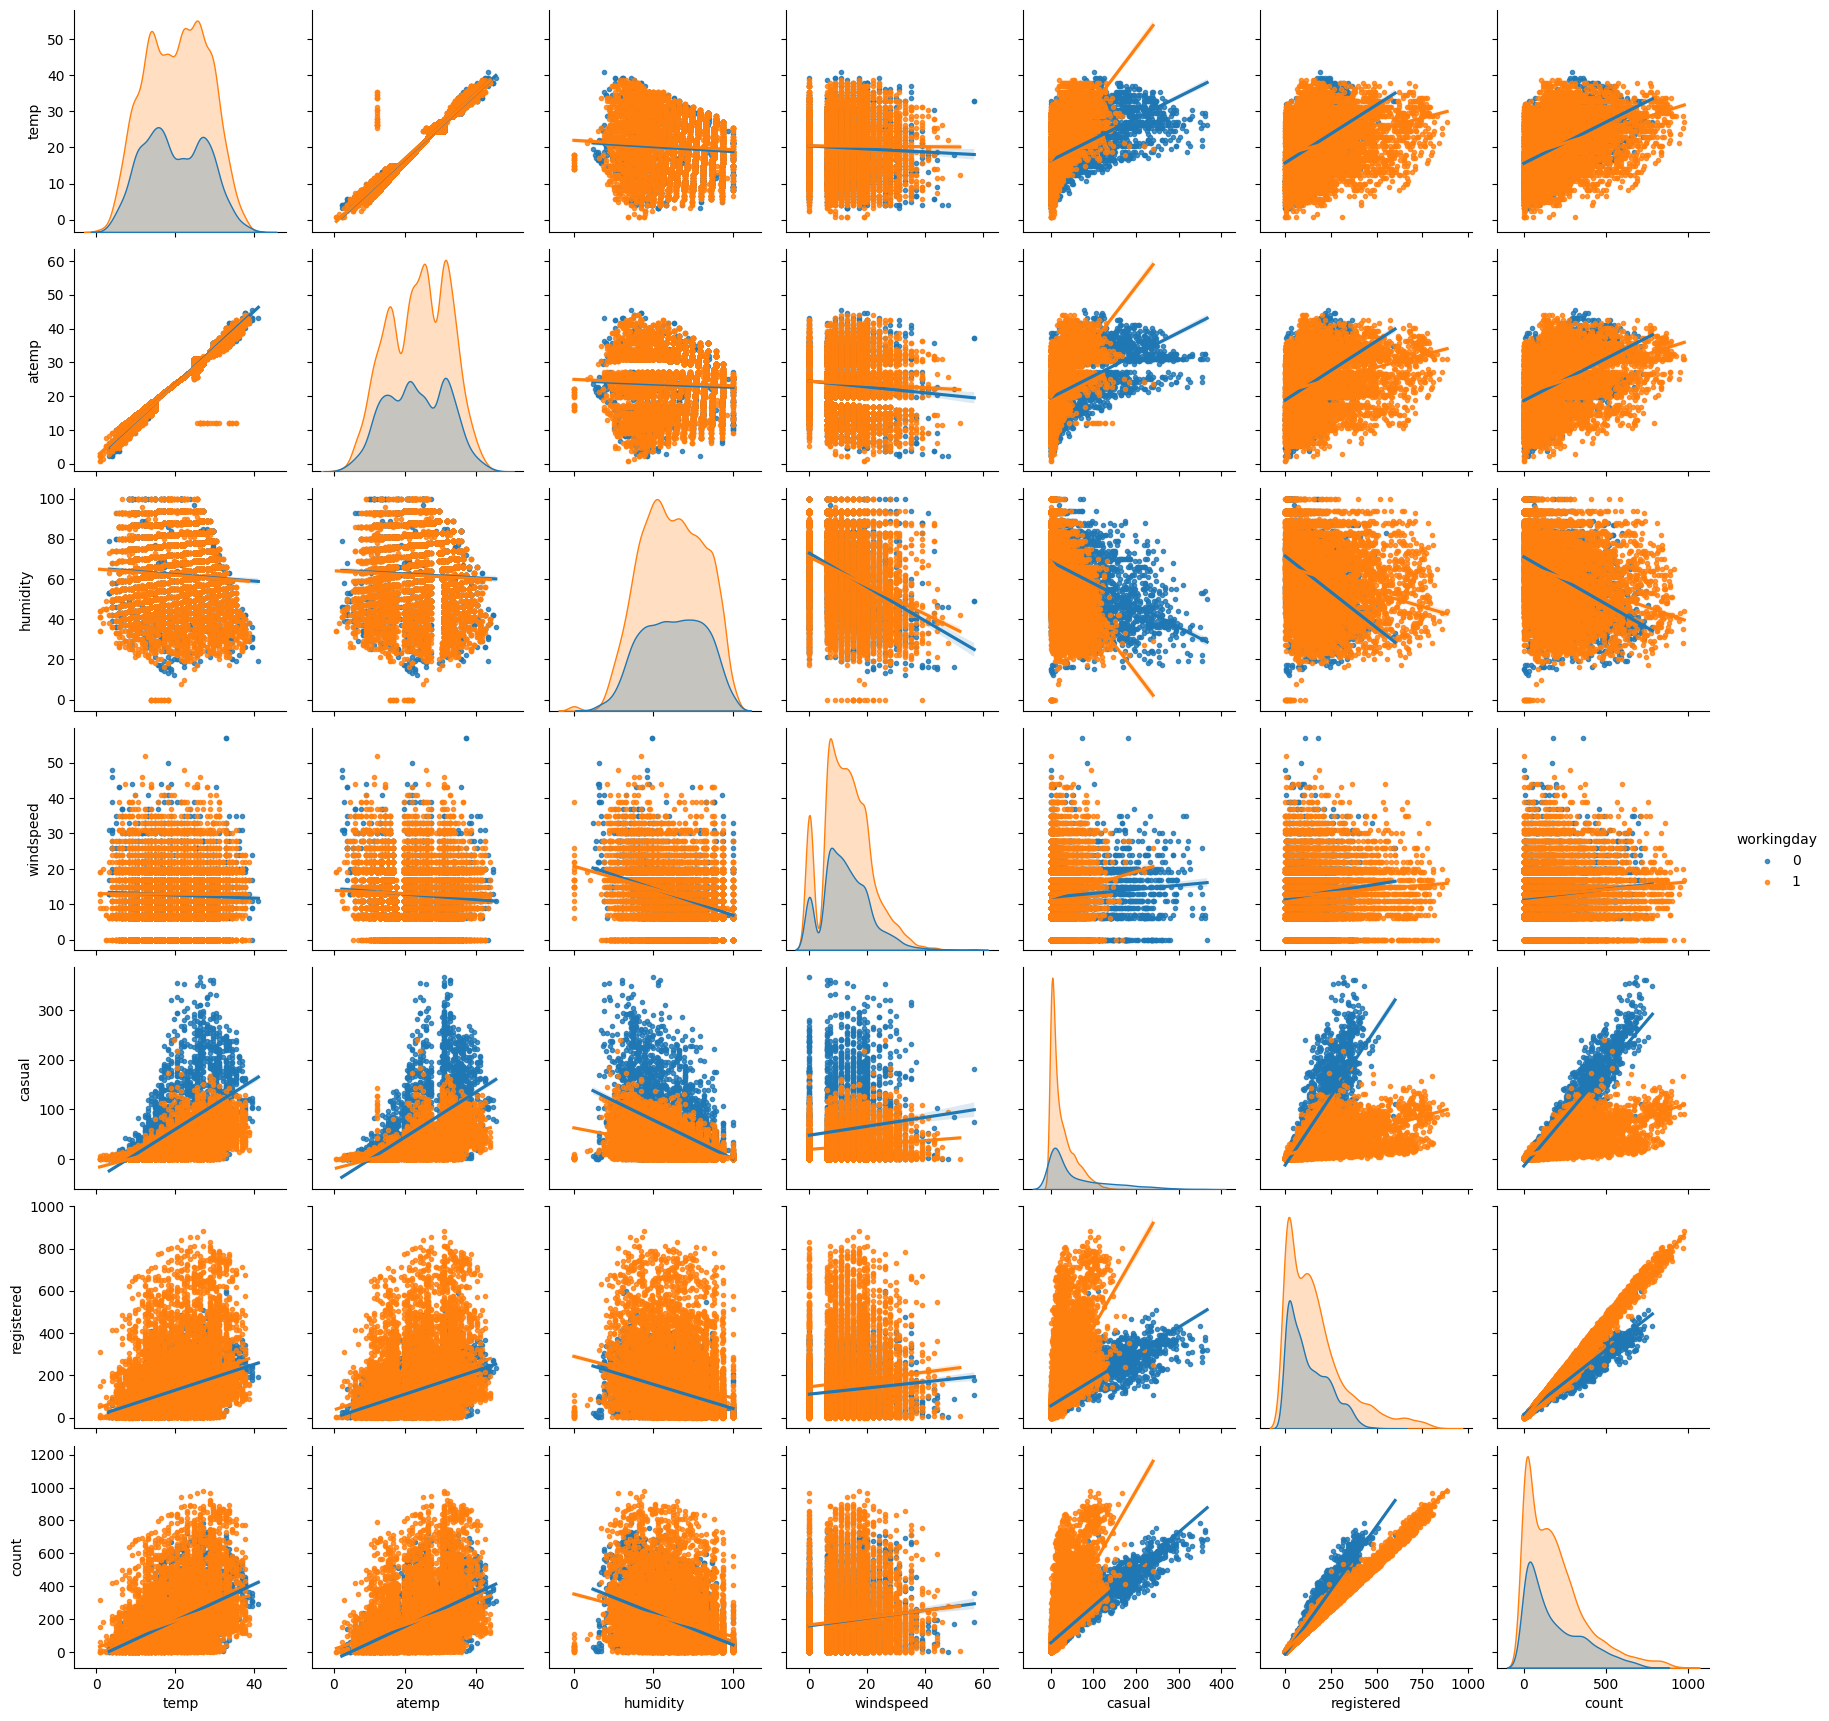

In [198]:
def plot_pairplot_with_regression(df, hue_column='workingday'):
    sns.pairplot(data=df, kind='reg', hue=hue_column, markers='.')
    plt.show()

plot_pairplot_with_regression(df)

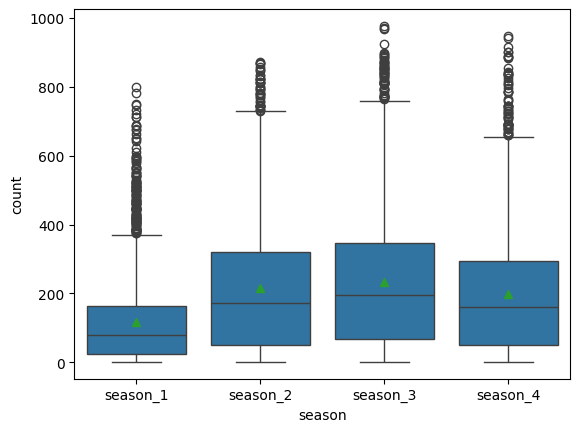

len(df_season_1) =  2686
len(df_season_2) =  2733
len(df_season_3) =  2733
len(df_season_4) =  2734


In [199]:
def boxplot_season_count(df):
    sns.boxplot(data=df, x='season', y='count', showmeans=True)
    plt.show()

boxplot_season_count(df)
df_season_1 = df.loc[df['season'] == 'season_1', 'count']
print("len(df_season_1) = ", len(df_season_1))
df_season_2 = df.loc[df['season'] == 'season_2', 'count']
print("len(df_season_2) = ", len(df_season_2))
df_season_3 = df.loc[df['season'] == 'season_3', 'count']
print("len(df_season_3) = ", len(df_season_3))
df_season_4 = df.loc[df['season'] == 'season_4', 'count']
print("len(df_season_4) = ", len(df_season_4))

***Visual examinations to ascertain whether the samples adhere to a normal distribution***

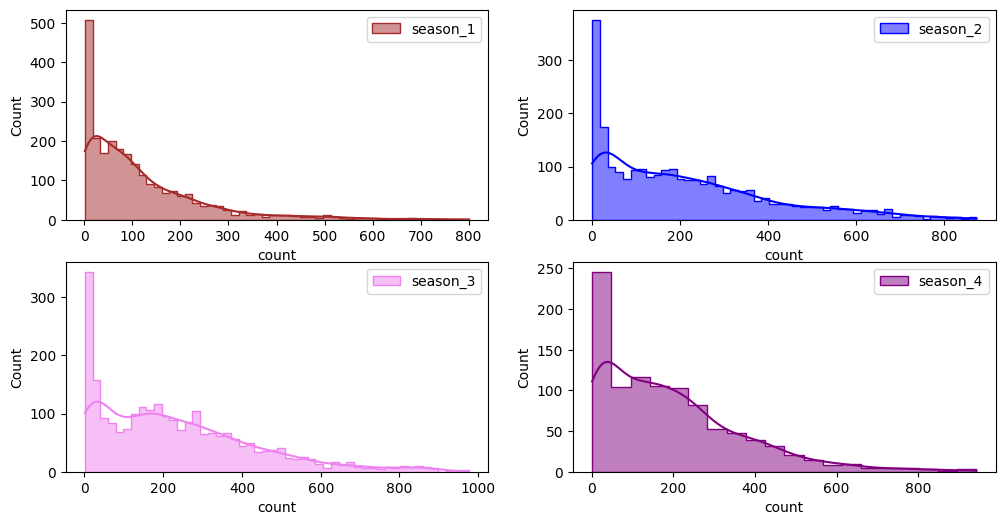

In [200]:
def plot_season_histograms(df_season_1, df_season_2, df_season_3, df_season_4):
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 2, 1)
    sns.histplot(df_season_1.sample(2500), bins=50, element='step', color='brown', kde=True, label='season_1')
    plt.legend()
    plt.subplot(2, 2, 2)
    sns.histplot(df_season_2.sample(2500), bins=50, element='step', color='blue', kde=True, label='season_2')
    plt.legend()
    plt.subplot(2, 2, 3)
    sns.histplot(df_season_3.sample(2500), bins=50, element='step', color='violet', kde=True, label='season_3')
    plt.legend()
    plt.subplot(2, 2, 4)
    sns.histplot(df_season_4.sample(1000), bins=20, element='step', color='purple', kde=True, label='season_4')
    plt.legend()
    plt.show()

plot_season_histograms(df_season_1, df_season_2, df_season_3, df_season_4)


```
Based on the plot above, it can be deduced that the distributions deviate from the normal distribution pattern.
```

***Assessing distribution via QQ Plot***

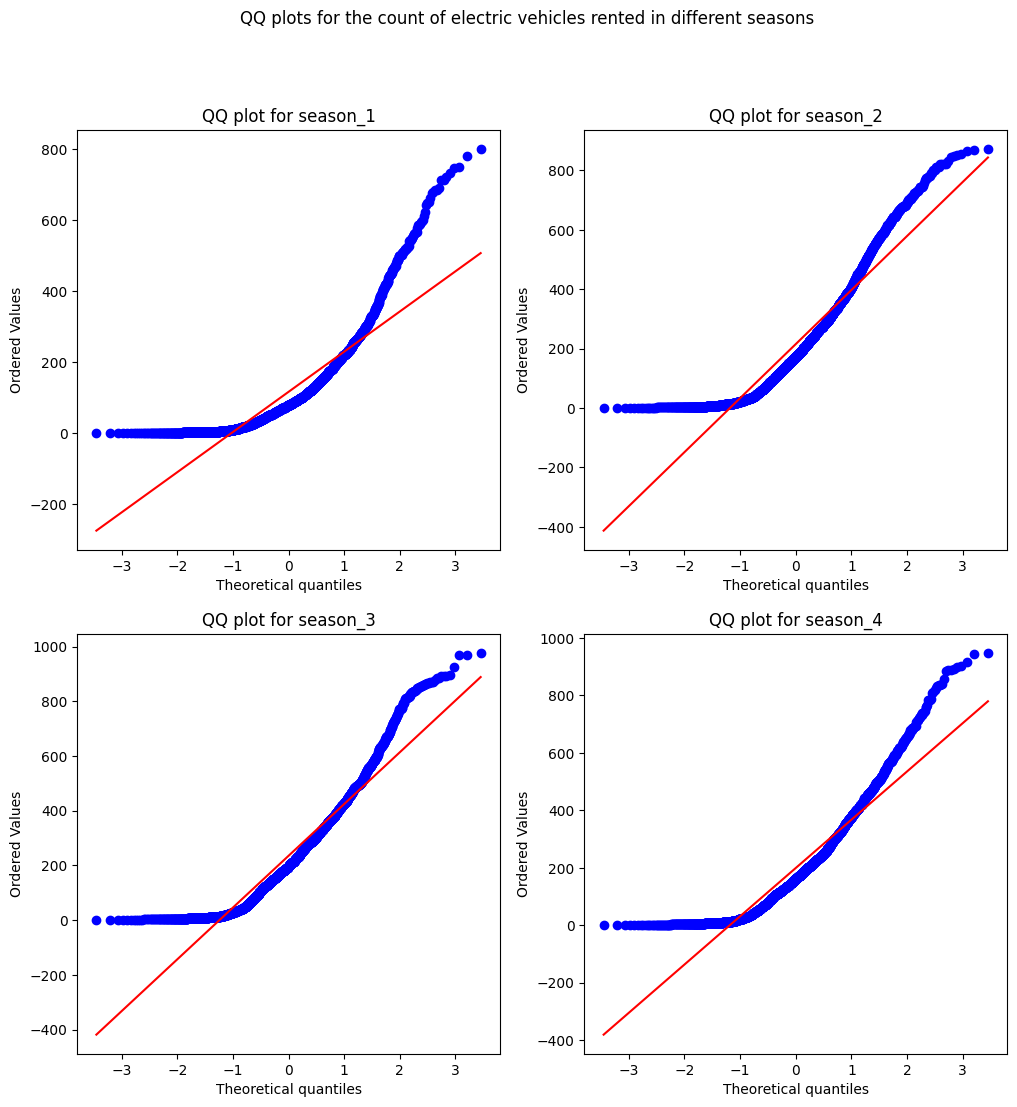

In [201]:
import matplotlib.pyplot as plt
import scipy.stats as stats

def plot_qq_plots_seasons(df_season_1, df_season_2, df_season_3, df_season_4):
    plt.figure(figsize=(12, 12))
    plt.suptitle('QQ plots for the count of electric vehicles rented in different seasons')
    sample_size = min(2500, len(df_season_1))
    plt.subplot(2, 2, 1)
    stats.probplot(df_season_1.sample(sample_size), plot=plt, dist='norm')
    plt.title('QQ plot for season_1')
    sample_size = min(2500, len(df_season_2))
    plt.subplot(2, 2, 2)
    stats.probplot(df_season_2.sample(sample_size), plot=plt, dist='norm')
    plt.title('QQ plot for season_2')
    sample_size = min(2500, len(df_season_3))
    plt.subplot(2, 2, 3)
    stats.probplot(df_season_3.sample(sample_size), plot=plt, dist='norm')
    plt.title('QQ plot for season_3')
    sample_size = min(2500, len(df_season_4))
    plt.subplot(2, 2, 4)
    stats.probplot(df_season_4.sample(sample_size), plot=plt, dist='norm')
    plt.title('QQ plot for season_4')

    plt.show()


plot_qq_plots_seasons(df_season_1, df_season_2, df_season_3, df_season_4)


```
In a QQ plot, if data points closely align with the diagonal line, the distribution is likely normal. Deviations from this line suggest non-normality, with S-shaped curves indicating heavier tails or peakedness. Based on the plot above, it can be deduced that the distributions deviate from the normal distribution pattern.
```

 #### Conducting the Shapiro-Wilk test to assess normality.

$H_0$: The sample conforms to a normal distribution.  
$H_1$: The sample deviates from a normal distribution.  

Significance Level ($\alpha$) = 0.05  

Test Statistics: Shapiro-Wilk test for normality


In [202]:
def shapiro_test_seasons(df_season_1, df_season_2, df_season_3, df_season_4):
    test_stat, p_value = stats.shapiro(df_season_1.sample(2500))
    print('Season_1:')
    print('p-value:', p_value)
    if p_value < 0.05:
        print('The sample does not follow normal distribution')
    else:
        print('The sample follows normal distribution')

    test_stat, p_value = stats.shapiro(df_season_2.sample(2500))
    print('\nSeason_2:')
    print('p-value:', p_value)
    if p_value < 0.05:
        print('The sample does not follow normal distribution')
    else:
        print('The sample follows normal distribution')

    test_stat, p_value = stats.shapiro(df_season_3.sample(2500))
    print('\nSeason_3:')
    print('p-value:', p_value)
    if p_value < 0.05:
        print('The sample does not follow normal distribution')
    else:
        print('The sample follows normal distribution')

    test_stat, p_value = stats.shapiro(df_season_4.sample(2500))
    print('\nSeason_4:')
    print('p-value:', p_value)
    if p_value < 0.05:
        print('The sample does not follow normal distribution')
    else:
        print('The sample follows normal distribution')

shapiro_test_seasons(df_season_1, df_season_2, df_season_3, df_season_4)

Season_1:
p-value: 1.923503189124498e-47
The sample does not follow normal distribution

Season_2:
p-value: 2.4169744974060843e-37
The sample does not follow normal distribution

Season_3:
p-value: 3.8882858972509213e-35
The sample does not follow normal distribution

Season_4:
p-value: 4.5566465258258154e-38
The sample does not follow normal distribution


***Applying the Box-Cox transformation to the data and assessing whether the transformed data adheres to a normal distribution***

In [203]:
def boxcox_shapiro_test_seasons(df_season_1, df_season_2, df_season_3, df_season_4):
    transformed_df_season_1 = stats.boxcox(df_season_1.sample(2500))[0]
    test_stat, p_value = stats.shapiro(transformed_df_season_1)
    print('Season_1:')
    print('p-value:', p_value)
    if p_value < 0.05:
        print('The sample does not follow normal distribution')
    else:
        print('The sample follows normal distribution')

    transformed_df_season_2 = stats.boxcox(df_season_2.sample(2500))[0]
    test_stat, p_value = stats.shapiro(transformed_df_season_2)
    print('\nSeason_2:')
    print('p-value:', p_value)
    if p_value < 0.05:
        print('The sample does not follow normal distribution')
    else:
        print('The sample follows normal distribution')

    transformed_df_season_3 = stats.boxcox(df_season_3.sample(2500))[0]
    test_stat, p_value = stats.shapiro(transformed_df_season_3)
    print('\nSeason_3:')
    print('p-value:', p_value)
    if p_value < 0.05:
        print('The sample does not follow normal distribution')
    else:
        print('The sample follows normal distribution')

    transformed_df_season_4 = stats.boxcox(df_season_4.sample(2500))[0]
    test_stat, p_value = stats.shapiro(transformed_df_season_4)
    print('\nSeason_4:')
    print('p-value:', p_value)
    if p_value < 0.05:
        print('The sample does not follow normal distribution')
    else:
        print('The sample follows normal distribution')


boxcox_shapiro_test_seasons(df_season_1, df_season_2, df_season_3, df_season_4)

Season_1:
p-value: 4.4682075596800425e-17
The sample does not follow normal distribution

Season_2:
p-value: 2.2174905263258163e-21
The sample does not follow normal distribution

Season_3:
p-value: 2.86797692479316e-21
The sample does not follow normal distribution

Season_4:
p-value: 8.093192125614107e-20
The sample does not follow normal distribution


Season 1: ***The sample does not follow a normal distribution (p < 0.05)***

Season 2: ***Similarly, the sample does not follow a normal distribution (p < 0.05)***

Season 3: ***Likewise, the sample does not follow a normal distribution (p < 0.05)***

Season 4: ***Similarly, the sample does not follow a normal distribution (p < 0.05)***

All samples fail the test for normality.

```
Due to the lack of normal distribution and unequal variance among the samples, the f_oneway test is not applicable here. Instead, we can conduct its non-parametric equivalent test, the Kruskal-Wallis H-test, for independent samples.
```

##### Ho : Mean no. of cycles rented is same for different seasons
##### Ha : Mean no. of cycles rented is different for different seasons
##### Assuming significance Level to be 0.05

In [204]:
def kruskal_test(df1, df2, df3, df4):
    alpha = 0.05
    test_stat, p_value = stats.kruskal(df1, df2, df3, df4)
    print('Test Statistic =', test_stat)
    print('p value =', p_value)

    if p_value < alpha:
        print('Reject Null Hypothesis')
    else:
        print('Failed to reject Null Hypothesis')

kruskal_test(df_season_1, df_season_2, df_season_3, df_season_4)

Test Statistic = 699.6668548181988
p value = 2.479008372608633e-151
Reject Null Hypothesis


##### Hence, there is a statistically significant difference in the average number of rental bikes across different seasons.

### Inferences from Analysis

- The average hourly count of rental bikes shows no significant difference between working and non-working days.
- There is no statistically significant relationship between weather types 1, 2, and 3 and seasons concerning the average hourly total number of bikes rented.
- The hourly total number of rental bikes significantly varies across different seasons.
- The hourly total number of rental bikes varies significantly across different weather conditions.
